In [26]:
import os
import pandas as pd
import numpy as np

DIR = os.getcwd()
print(DIR)

df = pd.read_csv(DIR + "/2012contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.head()



/Users/lukedobrovic/Data/CampaignContributions


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00401224,ACTBLUE,2012,30G,12963386776,11AI,SA11AI_9425044,841241,NaN,IND,...,F3X,4121220121174555632,t,EARMARKED FOR MARK TAKANO FOR CONGRESS (C00498...,2012,SA,NaN,4021220131182296848,http://docquery.fec.gov/cgi-bin/fecimg/?129633...,Contributions From Individuals/Persons Other T...
1,C00341396,MOVEON.ORG POLITICAL ACTION,2011,YE,13961260488,11AI,4339315,864348,NaN,IND,...,F3X,4040920131186159218,t,NaN,2012,SA,NaN,4040920131186180804,http://docquery.fec.gov/cgi-bin/fecimg/?139612...,Contributions From Individuals/Persons Other T...
2,C00401224,ACTBLUE,2012,12G,12960766372,11AI,SA11AI_8802287,824988,NaN,IND,...,F3X,4102520121168393985,t,EARMARKED FOR FRIENDS OF PATRICK MURPHY (C0049...,2012,SA,NaN,4012920131179543100,http://docquery.fec.gov/cgi-bin/fecimg/?129607...,Contributions From Individuals/Persons Other T...
3,C00495358,KAINE FOR VIRGINIA,2012,Q3,13020120158,11AI,NaN,859614,NaN,IND,...,F3,1022720130012974426,t,NaN,2012,SA,NaN,2030920131185170026,http://docquery.fec.gov/cgi-bin/fecimg/?130201...,Contributions From Individuals/Persons Other T...
4,C00167320,CONNECTICUT DEMOCRATIC STATE CENTRAL COMMITTEE,2012,12G,13961240166,12,C19658655,863810,NaN,IND,...,F3X,4040320131185983742,t,* DOLLARS FOR DEMOCRATS,2012,SA,NaN,4040320131186000487,http://docquery.fec.gov/cgi-bin/fecimg/?139612...,Transfers from Authorized Committees


In [27]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation"]]

In [28]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

In [29]:
df_selections.committee_name.unique()
#OBAMA Victory Fund, OBAMA for President, OBAMA Action Fund are funds with OBAMA in name

array(['ACTBLUE', 'MOVEON.ORG POLITICAL ACTION', 'KAINE FOR VIRGINIA',
       'CONNECTICUT DEMOCRATIC STATE CENTRAL COMMITTEE',
       'OBAMA FOR AMERICA', "EMILY'S LIST", 'ELIZABETH FOR MA INC',
       'REPUBLICAN NATIONAL COMMITTEE', 'OBAMA VICTORY FUND 2012',
       'ROB ZERBAN FOR CONGRESS', 'MCCASKILL FOR MISSOURI',
       'DAN ROBERTI FOR CONGRESS',
       'DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE',
       'BERKLEY FOR SENATE',
       'DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE',
       'RANGEL FOR CONGRESS', 'DGA ACTION',
       'NATIONAL REPUBLICAN SENATORIAL COMMITTEE',
       'FRIENDS OF SESSIONS SENATE COMMITTEE INC',
       'AMERICAN SOCIETY OF ANESTHESIOLOGISTS POLITICAL ACTION COMMITTEE',
       'MIDWEST VALUES PAC', 'MARTIN HEINRICH FOR SENATE',
       'DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE',
       'TAMMY BALDWIN FOR SENATE', 'OPPORTUNITY AND RENEWAL PAC',
       'FRIENDS OF PETE GALLEGO', 'JOSE HERNANDEZ FOR CONGRESS',
       'TIM BISHOP FOR CONGRESS'

In [30]:
df_OBAMA = df_selections[df_selections["committee_name"].str.contains("OBAMA")]

df_OBAMA.reset_index()

df_ROMNEY = df_selections[df_selections["committee_name"].str.contains("ROMNEY")]

df_ROMNEY.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation
0,1424,ROMNEY VICTORY INC,2012-10-23,15.0,COLUMBIA UNIVERSITY,PROFESSOR
1,1528,ROMNEY VICTORY INC,2012-08-26,2500.0,COLUMBIA UNIVERSITY,ACADEMIC
2,1718,ROMNEY VICTORY INC,2012-05-21,2500.0,COLUMBIA UNIVERSITY,PHYSICIAN
3,1982,ROMNEY FOR PRESIDENT INC.,2011-08-12,1000.0,COLUMBIA UNIVERSITY,PHYSICIAN
4,2451,ROMNEY VICTORY INC,2012-09-18,10000.0,COLUMBIA SOUTHER UNIVERSITY,PRESIDENT
...,...,...,...,...,...,...
79,9884,ROMNEY FOR PRESIDENT INC.,2012-10-06,250.0,COLUMBIA UNIVERSITY,GRADUATE STUDENT
80,10012,ROMNEY VICTORY INC,2012-10-21,10.0,COLUMBIA UNIVERSITY,PROFESSOR
81,10158,ROMNEY FOR PRESIDENT INC.,2012-09-07,130.0,COLUMBIA UNIVERSITY,SURGEON
82,10298,"ROMNEY FOR PRESIDENT, INC.",2012-11-05,15.0,COLUMBIA UNIVERSITY,PROFESSOR


In [31]:
df_OBAMA = df_OBAMA.groupby(["contribution_receipt_date"], as_index=False).sum()

df_ROMNEY = df_ROMNEY.groupby(["contribution_receipt_date"], as_index=False).sum()

Text(0.5, 1.0, 'Contributions to Committees w/ ROMNEY in their name since announcement of 2020 OBAMA Candidacy')

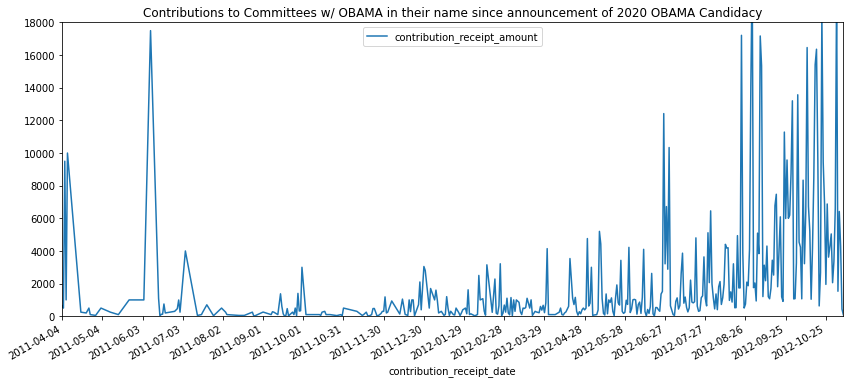

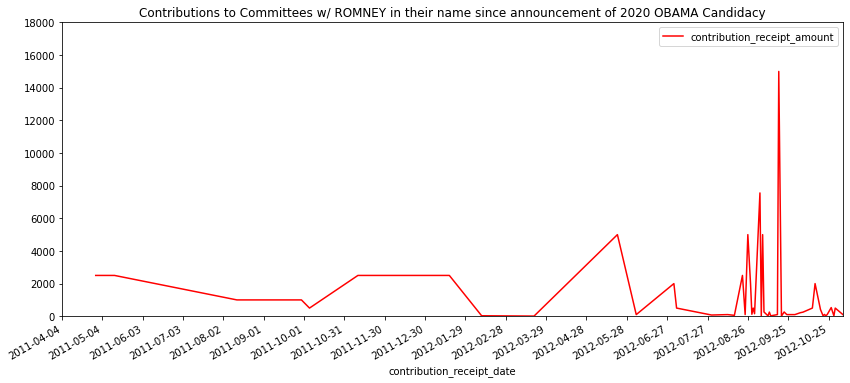

In [37]:
from datetime import datetime, timedelta
t = np.arange(datetime(2011,4,4), datetime(2012,11,7), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_OBAMA.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 18000])
ax1.set_title("Contributions to Committees w/ OBAMA in their name since announcement of 2020 OBAMA Candidacy")


ax2 = df_ROMNEY.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 18000])
ax2.set_title("Contributions to Committees w/ ROMNEY in their name since announcement of 2020 OBAMA Candidacy")

In [38]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,137,OBAMA FOR AMERICA,564758.28
1,138,OBAMA VICTORY FUND 2012,217629.30
2,47,DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL C...,191172.00
3,2,ACTBLUE,97850.60
4,41,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,49599.29


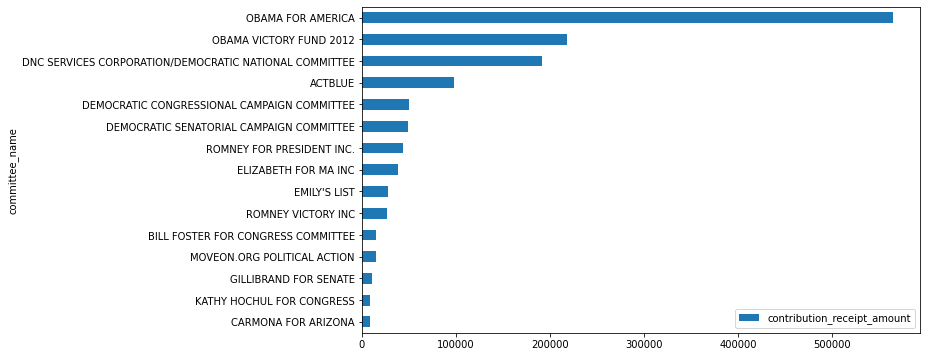

In [39]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.invert_yaxis()

In [40]:
occupations = df_selections["contributor_occupation"].value_counts()
occupations

PROFESSOR                                 2104
PHYSICIAN                                  824
SCIENTIST                                  699
STUDENT                                    340
GRADUATE STUDENT                           305
                                          ... 
EDUCATOR AND EDITOR                          1
CLINICAL PROFESSOR OF ANESTHESIOLOGY         1
HEALTH RESEARCH                              1
NIH POSTDOCTORAL FELLOW IN STATISTICAL       1
PUBLIC AFFAIRS                               1
Name: contributor_occupation, Length: 556, dtype: int64

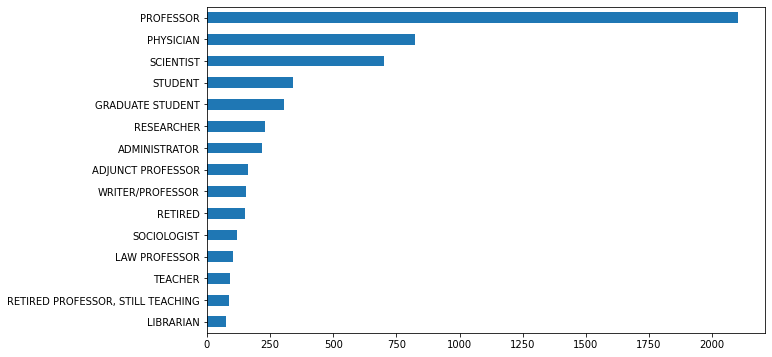

In [41]:
ax4 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax4.invert_yaxis()